In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
num = 50
np.random.seed(0)
x_data = np.random.uniform(0, 10, num)
y_data = 0.5 * x_data + 1 + np.random.normal(0, 1, num)
data = np.column_stack([x_data, y_data])

In [3]:
X = sm.add_constant(x_data)
model = sm.OLS(y_data, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     91.59
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.05e-12
Time:                        11:11:29   Log-Likelihood:                -67.046
No. Observations:                  50   AIC:                             138.1
Df Residuals:                      48   BIC:                             141.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9928      0.296      3.358      0.0

In [4]:
x_array = np.linspace(0, 10, 101)
predicted = result.params[1] * x_array + result.params[0]

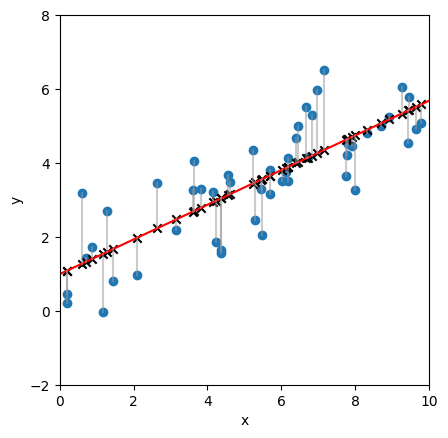

In [6]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.scatter(x_data, result.fittedvalues,
          color='k', marker='x')
ax.plot(x_array, predicted, color='r')
data_ = np.column_stack([x_data, result.fittedvalues])
ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),
       ([j for (i,j) in data_], [j for (i, j) in data]),
       c=[0.6, 0.6, 0.6], alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 10)
ax.set_ylim(-2, 8)
fig.savefig('一元线性回归.svg', format='svg')